In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
sns.set()
import math

In [2]:
#import data
data = pd.read_csv('real-fake-7.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1189 non-null   int64  
 1   userFollowerCount            1189 non-null   int64  
 2   userFollowingCount           1189 non-null   int64  
 3   userBiographyLength          1189 non-null   int64  
 4   userMediaCount               1189 non-null   int64  
 5   userHasProfilPic             1189 non-null   int64  
 6   userIsPrivate                1189 non-null   int64  
 7   usernameDigitCount           1189 non-null   int64  
 8   usernameLength               1189 non-null   int64  
 9   isFake                       1189 non-null   int64  
 10  Follower_to_Following_ratio  1189 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 102.3 KB


In [3]:
columns=data.columns
fake = data['isFake'] 
data.drop(columns= ['isFake', 'Unnamed: 0'], inplace=True)
columns=data.columns

In [4]:
data.head(3)

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,Follower_to_Following_ratio
0,258,238,0,0,1,0,0,10,1.084034
1,263,482,30,29,1,1,0,8,0.545643
2,51,78,9,0,1,1,0,10,0.653846


# PCA

https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

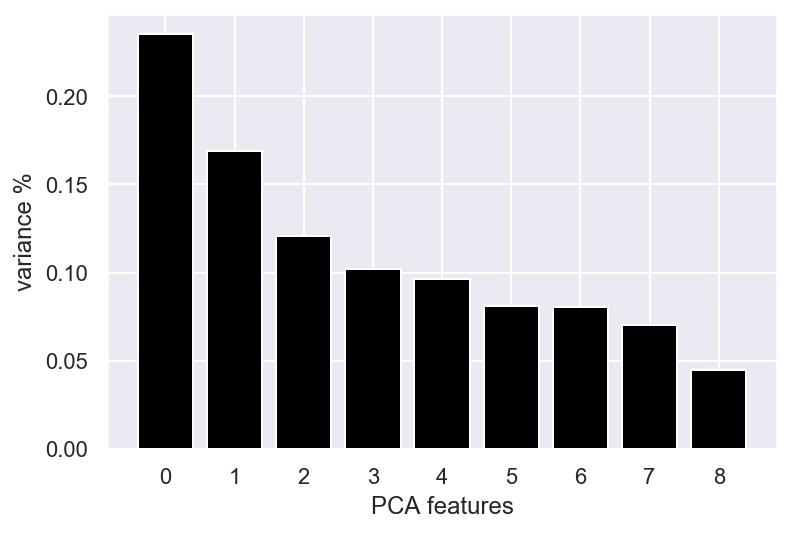

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
"""# Load in the data
df = pd.read_csv('2013_2014_cleaned.csv')"""
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(data)
# Create a PCA instance: pca
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [6]:
pca_data=PCA_components.iloc[:,:1]

# data visualization

In [7]:
#pca_data.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 'PC11', 'PC12', 'PC13','PC14', 'PC15','PC16','PC17']
pca_data.columns=['PC1']

Iris Dataset Visualization and Machine Learning

https://www.kaggle.com/xuhewen/iris-dataset-visualization-and-machine-learning

Text(0.5, 1.0, 'D3')

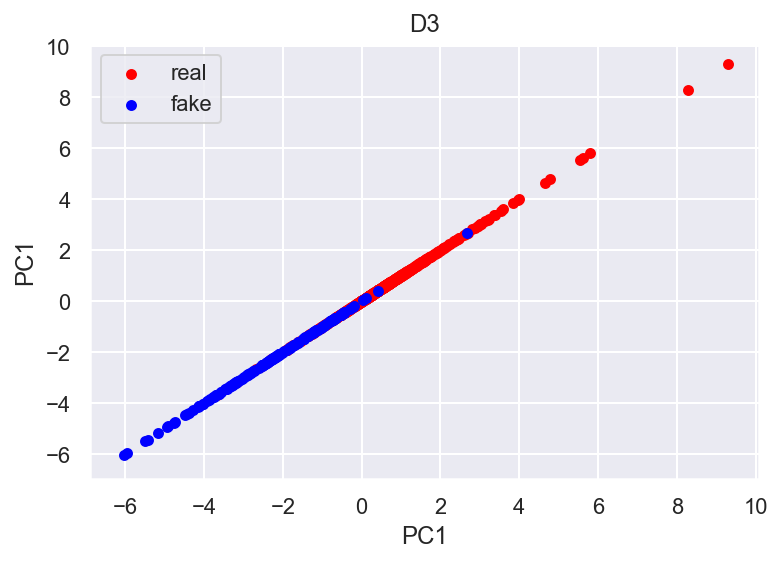

In [8]:
ax = pca_data[fake==0].plot.scatter(x='PC1', y='PC1', color='red', label='real')
pca_data[fake==1].plot.scatter(x='PC1', y='PC1', color='blue', label='fake', ax=ax)
ax.set_title("D3")

# Implementing K-Means Clustering in Python


The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

In [9]:
from sklearn.cluster import KMeans

In [10]:
# k means using 2 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 2, init='k-means++')
kmeans.fit(pca_data)
pred = kmeans.predict(pca_data)

In [11]:
labels_true=fake
labels_pred=pred
labels = pred
X=pca_data
y=fake

In [12]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(labels_true, labels_pred)

array([[930,  64],
       [ 33, 162]])

In [13]:
np.unique(labels_pred)

array([0, 1])

In [14]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

print("Adjusted Rand index:", 
      metrics.adjusted_rand_score(labels_true, labels_pred))
print("Mutual Information based scores:", 
      metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Homogeneity:", 
      metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness:", 
      metrics.completeness_score(labels_true, labels_pred))
print("V-measure:",
      metrics.v_measure_score(labels_true, labels_pred))
print("Fowlkes-Mallows scores:",
      metrics.fowlkes_mallows_score(labels_true, labels_pred))

print("Silhouette Coefficient:",
      metrics.silhouette_score(X, labels, metric='euclidean'))

Adjusted Rand index: 0.6372582535380912
Mutual Information based scores: 0.45431130835074995
Homogeneity: 0.47523193906265404
Completeness: 0.4360633051847859
V-measure: 0.45480586316056115
Fowlkes-Mallows scores: 0.8944415746237888
Silhouette Coefficient: 0.6665974098701638


Functions to Plot KMeans, Hierarchical and DBSCAN Clustering

https://medium.com/@plog397/functions-to-plot-kmeans-hierarchical-and-dbscan-clustering-c4146ed69744

Text(0.5, 1.0, 'k-means_D3')

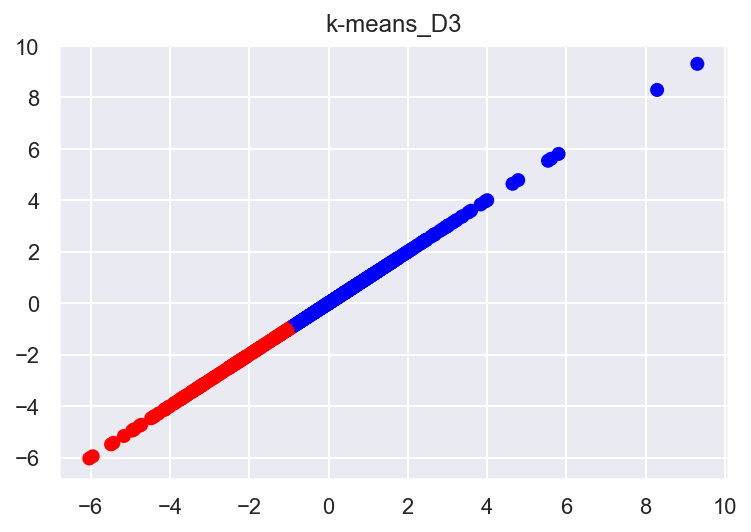

In [15]:
plt.scatter(x=pca_data.PC1, y=pca_data.PC1,c=pred, cmap='bwr')
plt.title("k-means_D3")